#Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/shadow_robot_dataset.csv'
df = pd.read_csv(dataset_path)

In [ ]:
df

,experiment_number,robustness,H1_F1J2_pos,H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_pos,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_pos,H1_F1J1_vel,...,H1_F2J1_pos,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_pos,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_pos,H1_F2J2_vel,H1_F2J2_eff,measurement_number
0,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.118209,6.838743,1.454113,0.302276,-18.738705,0.000000,-0.032352,0.127232,...,0.109246,0.042166,0.041517,0.439459,-13.975613,0.000000,0.177114,5.456443,1.493776,0
1,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.152945,5.997176,1.098305,0.308893,-14.173090,0.000000,-0.027381,0.273711,...,0.105656,-0.130178,0.075700,0.446421,-17.618561,0.000000,0.176817,5.130892,1.493497,1
2,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.162168,5.302321,0.999142,0.314331,-13.093510,0.000000,-0.025808,0.184343,...,0.103620,-0.162815,0.095730,0.439690,-13.031110,0.000000,0.174343,5.650662,1.523433,2
3,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.137684,6.504519,1.256002,0.304333,-16.948796,0.000000,-0.027398,0.121100,...,0.106332,-0.186364,0.068382,0.445833,-11.763374,0.000000,0.180723,5.267410,1.455800,3
4,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.161747,4.899113,0.999313,0.315815,-13.700695,0.000000,-0.025698,0.079876,...,0.104104,-0.216307,0.090358,0.438578,-15.347191,0.000000,0.164628,6.339569,1.627478,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992636,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.130388,7.184142,1.843887,0.253100,-19.537161,0.000000,-0.027824,0.050854,...,-0.064553,-0.044033,0.007415,0.373140,-4.915019,0.000000,0.209603,2.067703,0.417153,25
992637,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.128054,7.520762,1.870689,0.251921,-20.113798,0.000000,-0.028146,0.034234,...,-0.064192,-0.006108,0.004178,0.372934,-4.841139,0.000000,0.207827,1.989526,0.434158,26
992638,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.130326,7.749944,1.850211,0.251145,-21.228001,0.000000,-0.027532,-0.020924,...,-0.064897,0.035043,0.011649,0.371388,-5.145467,0.000000,0.205514,2.087309,0.458245,27
992639,2ce8d77087094b11a8596c53f1c2df15,96.585662,0.149129,6.136092,1.646002,0.259715,-17.988816,0.000000,-0.024531,0.080302,...,-0.067001,0.041980,0.032763,0.371682,-5.562895,0.000000,0.205412,2.323993,0.461640,28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992641 entries, 0 to 992640
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   experiment_number    992641 non-null  object 
 1    robustness          992641 non-null  float64
 2    H1_F1J2_pos         992641 non-null  float64
 3    H1_F1J2_vel         992641 non-null  float64
 4    H1_F1J2_eff         992641 non-null  float64
 5    H1_F1J3_pos         992641 non-null  float64
 6    H1_F1J3_vel         992641 non-null  float64
 7    H1_F1J3_eff         992641 non-null  float64
 8    H1_F1J1_pos         992641 non-null  float64
 9    H1_F1J1_vel         992641 non-null  float64
 10   H1_F1J1_eff         992641 non-null  float64
 11   H1_F3J1_pos         992641 non-null  float64
 12   H1_F3J1_vel         992641 non-null  float64
 13   H1_F3J1_eff         992641 non-null  float64
 14   H1_F3J2_pos         992641 non-null  float64
 15   H1_F3J2_vel     

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,experiment_number,robustness,H1_F1J2_pos,H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_pos,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_pos,H1_F1J1_vel,...,H1_F2J1_pos,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_pos,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_pos,H1_F2J2_vel,H1_F2J2_eff,measurement_number
0,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.118209,6.838743,1.454113,0.302276,-18.738705,0.0,-0.032352,0.127232,...,0.109246,0.042166,0.041517,0.439459,-13.975613,0.0,0.177114,5.456443,1.493776,0
1,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.152945,5.997176,1.098305,0.308893,-14.173090,0.0,-0.027381,0.273711,...,0.105656,-0.130178,0.075700,0.446421,-17.618561,0.0,0.176817,5.130892,1.493497,1
2,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.162168,5.302321,0.999142,0.314331,-13.093510,0.0,-0.025808,0.184343,...,0.103620,-0.162815,0.095730,0.439690,-13.031110,0.0,0.174343,5.650662,1.523433,2
3,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.137684,6.504519,1.256002,0.304333,-16.948796,0.0,-0.027398,0.121100,...,0.106332,-0.186364,0.068382,0.445833,-11.763374,0.0,0.180723,5.267410,1.455800,3
4,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.161747,4.899113,0.999313,0.315815,-13.700695,0.0,-0.025698,0.079876,...,0.104104,-0.216307,0.090358,0.438578,-15.347191,0.0,0.164628,6.339569,1.627478,4


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
unique_count = df['experiment_number'].nunique()
print("Number of unique values in the column: ", unique_count)

Number of unique values in the column:  53937


In [ ]:

df = df.drop_duplicates(subset=['experiment_number'])
df

,experiment_number,robustness,H1_F1J2_pos,H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_pos,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_pos,H1_F1J1_vel,...,H1_F2J1_pos,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_pos,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_pos,H1_F2J2_vel,H1_F2J2_eff,measurement_number
0,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.118209,6.838743,1.454113,0.302276,-18.738705,0.000000,-0.032352,0.127232,...,0.109246,0.042166,0.041517,0.439459,-13.975613,0.000000,0.177114,5.456443,1.493776,0
30,03d7b71061c64b6d8c314aeb3f573fa3,88.897268,0.031208,3.566505,1.883636,0.312086,-13.847311,0.000000,-0.011679,-0.495026,...,-0.007308,0.126498,0.039440,0.367277,-8.960717,0.000000,0.197000,2.973072,0.793145,0
56,8d21095070fd40f2bbbc7c9d7c626da7,103.453542,0.044742,-6.268999,0.000000,0.403400,22.028557,0.506585,0.020897,-0.171092,...,-0.032490,-0.030481,0.044094,0.381343,11.919154,0.380467,0.200142,-4.510422,0.000000,0
70,bdf6eb822fc24dd2b5199e98ca40f20f,142.312372,0.212814,3.095059,0.581455,0.422868,-7.092308,0.000000,0.079975,0.047582,...,-0.013722,-0.002580,-0.023305,0.303821,10.816037,0.249893,0.062826,-3.146888,0.000000,0
100,397ec7b4799c4a6890f6457d7b208d81,89.666035,0.144892,3.012016,0.998189,0.326335,-9.441263,0.000000,-0.038051,-0.044010,...,0.047746,0.092288,0.046486,0.345433,-7.882531,0.000000,0.183322,3.406870,0.609228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992540,406ace230f6841ee8d2c05b3908959d1,113.575878,0.077302,-9.798415,0.000000,0.332560,25.909988,0.843003,0.043055,0.233430,...,0.016249,0.060346,-0.005698,0.351299,4.748627,0.147207,0.206132,-2.086669,0.000000,0
992569,e34f08e32435407488b2c55fb8fe60c5,17.366802,0.052071,-0.174146,1.920349,0.391108,0.260350,0.060215,0.033424,0.003156,...,-0.071550,-0.004110,0.037389,0.431297,0.029099,0.259332,0.009718,0.014072,1.999796,0
992585,dc76c9ef6fbc40e2b43b19b5418498bc,54.543295,0.178748,-0.107195,0.677272,0.387305,-0.088845,0.154554,-0.114908,-0.013273,...,0.021326,-0.012064,0.045309,0.360567,-0.156745,0.098047,0.135710,-0.021644,0.554665,0
992598,139470da79fb425e9e249ac8a39068e2,12.408147,0.047440,0.005035,1.723020,0.404824,-0.050608,0.084646,-0.084208,-0.003863,...,0.027651,0.001783,0.049383,0.384370,0.112569,0.272131,0.016774,-0.076118,1.891768,0


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
z = df.drop(['experiment_number'], axis=1)

In [ ]:
df

,experiment_number,robustness,H1_F1J2_pos,H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_pos,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_pos,H1_F1J1_vel,...,H1_F2J1_pos,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_pos,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_pos,H1_F2J2_vel,H1_F2J2_eff,measurement_number
0,2ccc5f2c534f4be2b329eada685ce311,85.758903,0.118209,6.838743,1.454113,0.302276,-18.738705,0.000000,-0.032352,0.127232,...,0.109246,0.042166,0.041517,0.439459,-13.975613,0.000000,0.177114,5.456443,1.493776,0
1,03d7b71061c64b6d8c314aeb3f573fa3,88.897268,0.031208,3.566505,1.883636,0.312086,-13.847311,0.000000,-0.011679,-0.495026,...,-0.007308,0.126498,0.039440,0.367277,-8.960717,0.000000,0.197000,2.973072,0.793145,0
2,8d21095070fd40f2bbbc7c9d7c626da7,103.453542,0.044742,-6.268999,0.000000,0.403400,22.028557,0.506585,0.020897,-0.171092,...,-0.032490,-0.030481,0.044094,0.381343,11.919154,0.380467,0.200142,-4.510422,0.000000,0
3,bdf6eb822fc24dd2b5199e98ca40f20f,142.312372,0.212814,3.095059,0.581455,0.422868,-7.092308,0.000000,0.079975,0.047582,...,-0.013722,-0.002580,-0.023305,0.303821,10.816037,0.249893,0.062826,-3.146888,0.000000,0
4,397ec7b4799c4a6890f6457d7b208d81,89.666035,0.144892,3.012016,0.998189,0.326335,-9.441263,0.000000,-0.038051,-0.044010,...,0.047746,0.092288,0.046486,0.345433,-7.882531,0.000000,0.183322,3.406870,0.609228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53932,406ace230f6841ee8d2c05b3908959d1,113.575878,0.077302,-9.798415,0.000000,0.332560,25.909988,0.843003,0.043055,0.233430,...,0.016249,0.060346,-0.005698,0.351299,4.748627,0.147207,0.206132,-2.086669,0.000000,0
53933,e34f08e32435407488b2c55fb8fe60c5,17.366802,0.052071,-0.174146,1.920349,0.391108,0.260350,0.060215,0.033424,0.003156,...,-0.071550,-0.004110,0.037389,0.431297,0.029099,0.259332,0.009718,0.014072,1.999796,0
53934,dc76c9ef6fbc40e2b43b19b5418498bc,54.543295,0.178748,-0.107195,0.677272,0.387305,-0.088845,0.154554,-0.114908,-0.013273,...,0.021326,-0.012064,0.045309,0.360567,-0.156745,0.098047,0.135710,-0.021644,0.554665,0
53935,139470da79fb425e9e249ac8a39068e2,12.408147,0.047440,0.005035,1.723020,0.404824,-0.050608,0.084646,-0.084208,-0.003863,...,0.027651,0.001783,0.049383,0.384370,0.112569,0.272131,0.016774,-0.076118,1.891768,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(z)
df_scaled = pd.DataFrame(df_scaled,columns=z.columns )
df_scaled

,robustness,H1_F1J2_pos,H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_pos,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_pos,H1_F1J1_vel,H1_F1J1_eff,...,H1_F2J1_pos,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_pos,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_pos,H1_F2J2_vel,H1_F2J2_eff,measurement_number
0,0.606827,-0.045008,1.274875,0.318402,-0.099991,-0.864003,0.039372,-0.701040,0.787024,-0.002589,...,2.709752,0.380143,1.043772,0.019786,-1.014334,-0.069308,0.082798,1.770112,0.751410,0.0
1,0.665017,-0.450045,0.666173,0.525693,-0.094089,-0.637485,0.039372,-0.183578,-3.005794,0.819170,...,-0.166526,1.131812,0.984059,-0.035473,-0.654811,-0.069308,0.206256,0.960788,0.162477,0.0
2,0.934909,-0.387038,-1.163430,-0.383364,-0.039159,1.023904,0.170223,0.631820,-1.031338,0.256484,...,-0.787972,-0.267373,1.117863,-0.024705,0.842086,0.130366,0.225760,-1.478062,-0.504220,0.0
3,1.655402,0.395432,0.578474,-0.102749,-0.027447,-0.324665,0.039372,2.110571,0.301537,-0.285461,...,-0.324799,-0.018687,-0.819875,-0.084051,0.763003,0.061839,-0.626743,-1.033690,-0.504220,0.0
4,0.679271,0.079218,0.563026,0.098369,-0.085518,-0.433444,0.039372,-0.843681,-0.256736,-0.253012,...,1.192076,0.826887,1.186645,-0.052196,-0.577515,-0.069308,0.121334,1.102162,0.007881,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53932,1.122590,-0.235452,-1.819972,-0.383364,-0.081773,1.203651,0.257120,1.186455,1.434329,0.594731,...,0.414798,0.542183,-0.313666,-0.047705,0.328024,0.007948,0.262950,-0.688167,-0.504220,0.0
53933,-0.661251,-0.352914,-0.029664,0.543412,-0.046553,0.015832,0.054925,0.945376,0.030754,-0.561977,...,-1.751875,-0.032323,0.925097,0.013537,-0.010323,0.066793,-0.956462,-0.003542,1.176757,0.0
53934,0.028049,0.236835,-0.017210,-0.056507,-0.048841,-0.000339,0.079293,-2.767440,-0.069388,0.672027,...,0.540099,-0.103216,1.152810,-0.040610,-0.023646,-0.017851,-0.174258,-0.015182,-0.037983,0.0
53935,-0.753191,-0.374475,0.003667,0.448179,-0.038302,0.001431,0.061236,-1.999008,-0.012029,-0.617608,...,0.696179,0.020198,1.269922,-0.022387,-0.004339,0.073510,-0.912651,-0.032935,1.085951,0.0


In [ ]:
unique_count = df['robustness'].nunique()
print("Number of unique values in the column: ", unique_count)

Number of unique values in the column:  45707


# EDA

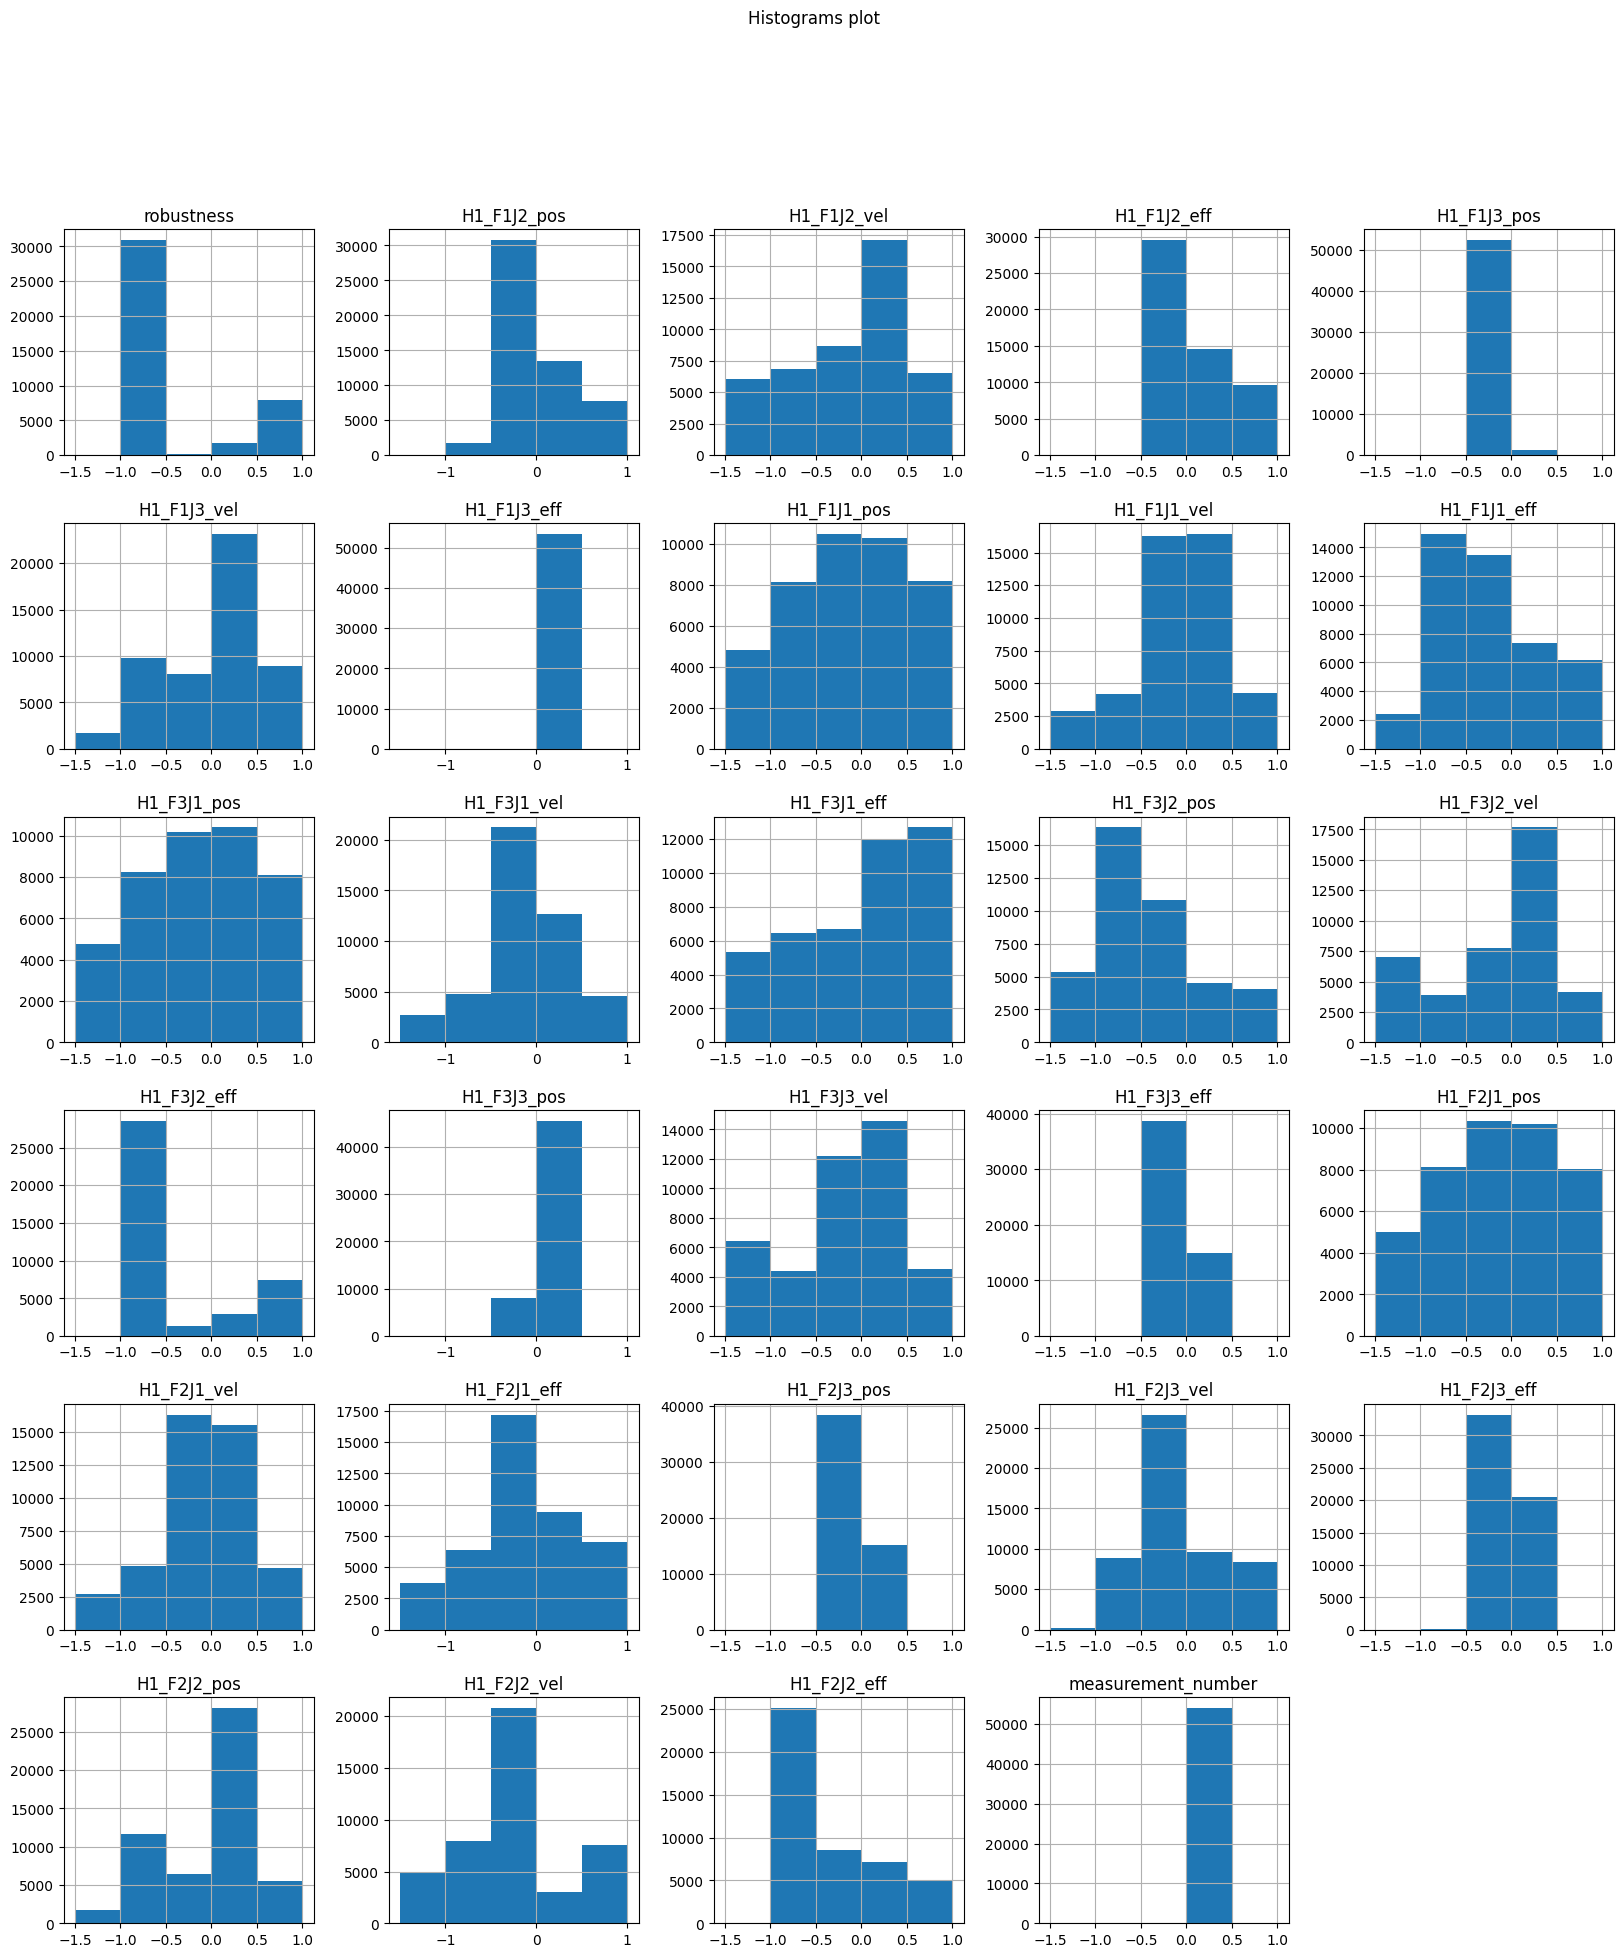

In [ ]:
df_scaled.hist(bins= [-1.5, -1, -0.5, 0, 0.5,1], figsize=(20, 22))
plt.suptitle("Histograms plot")
plt.show()

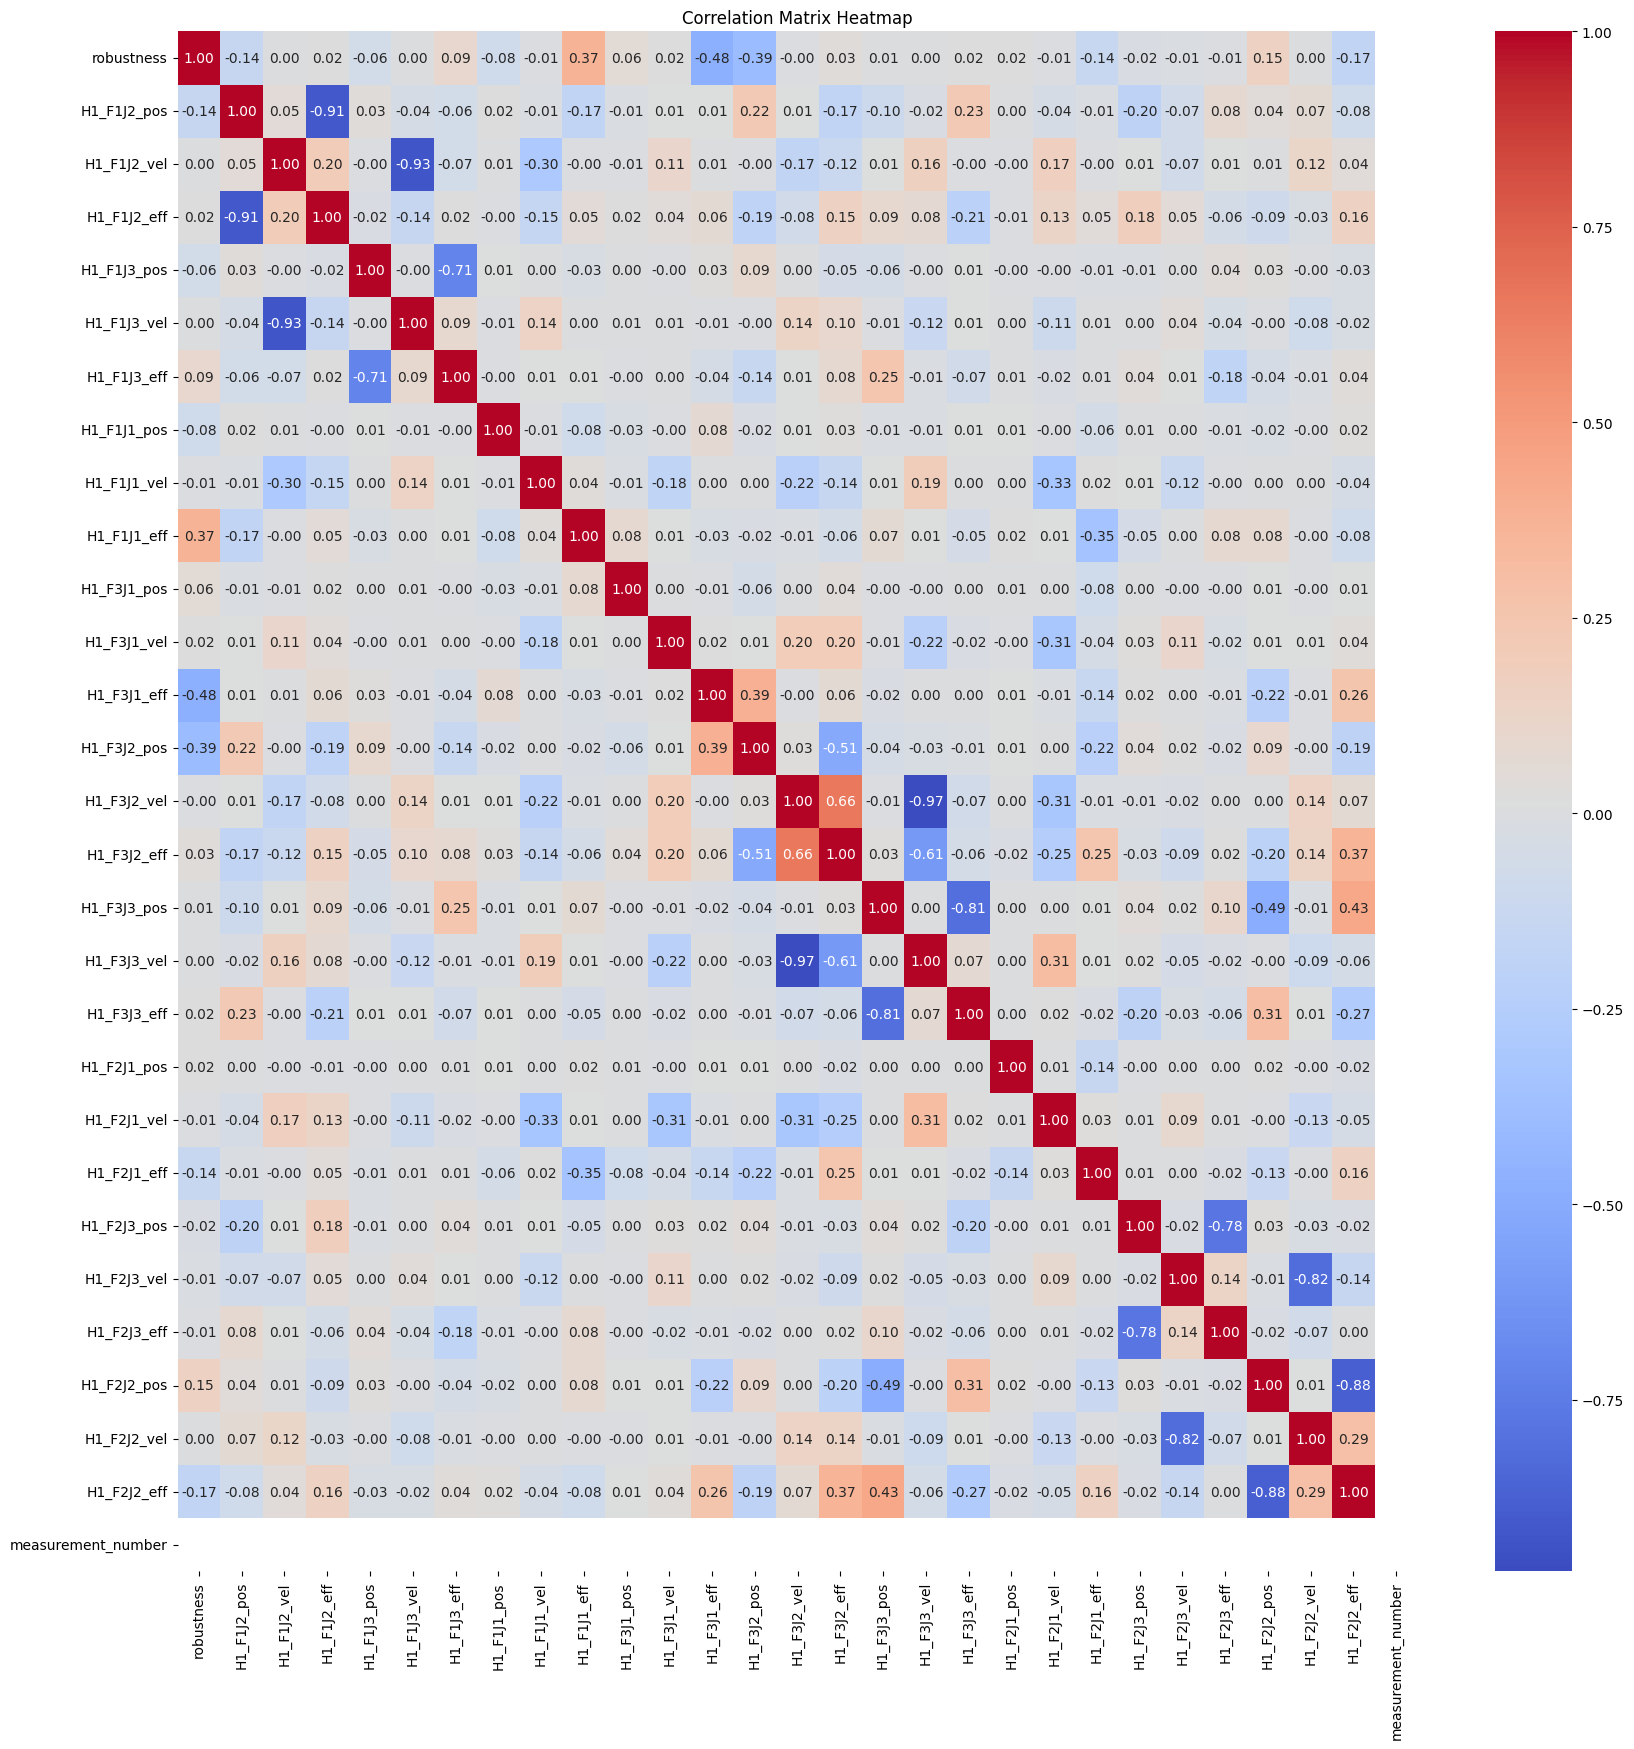

In [ ]:
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

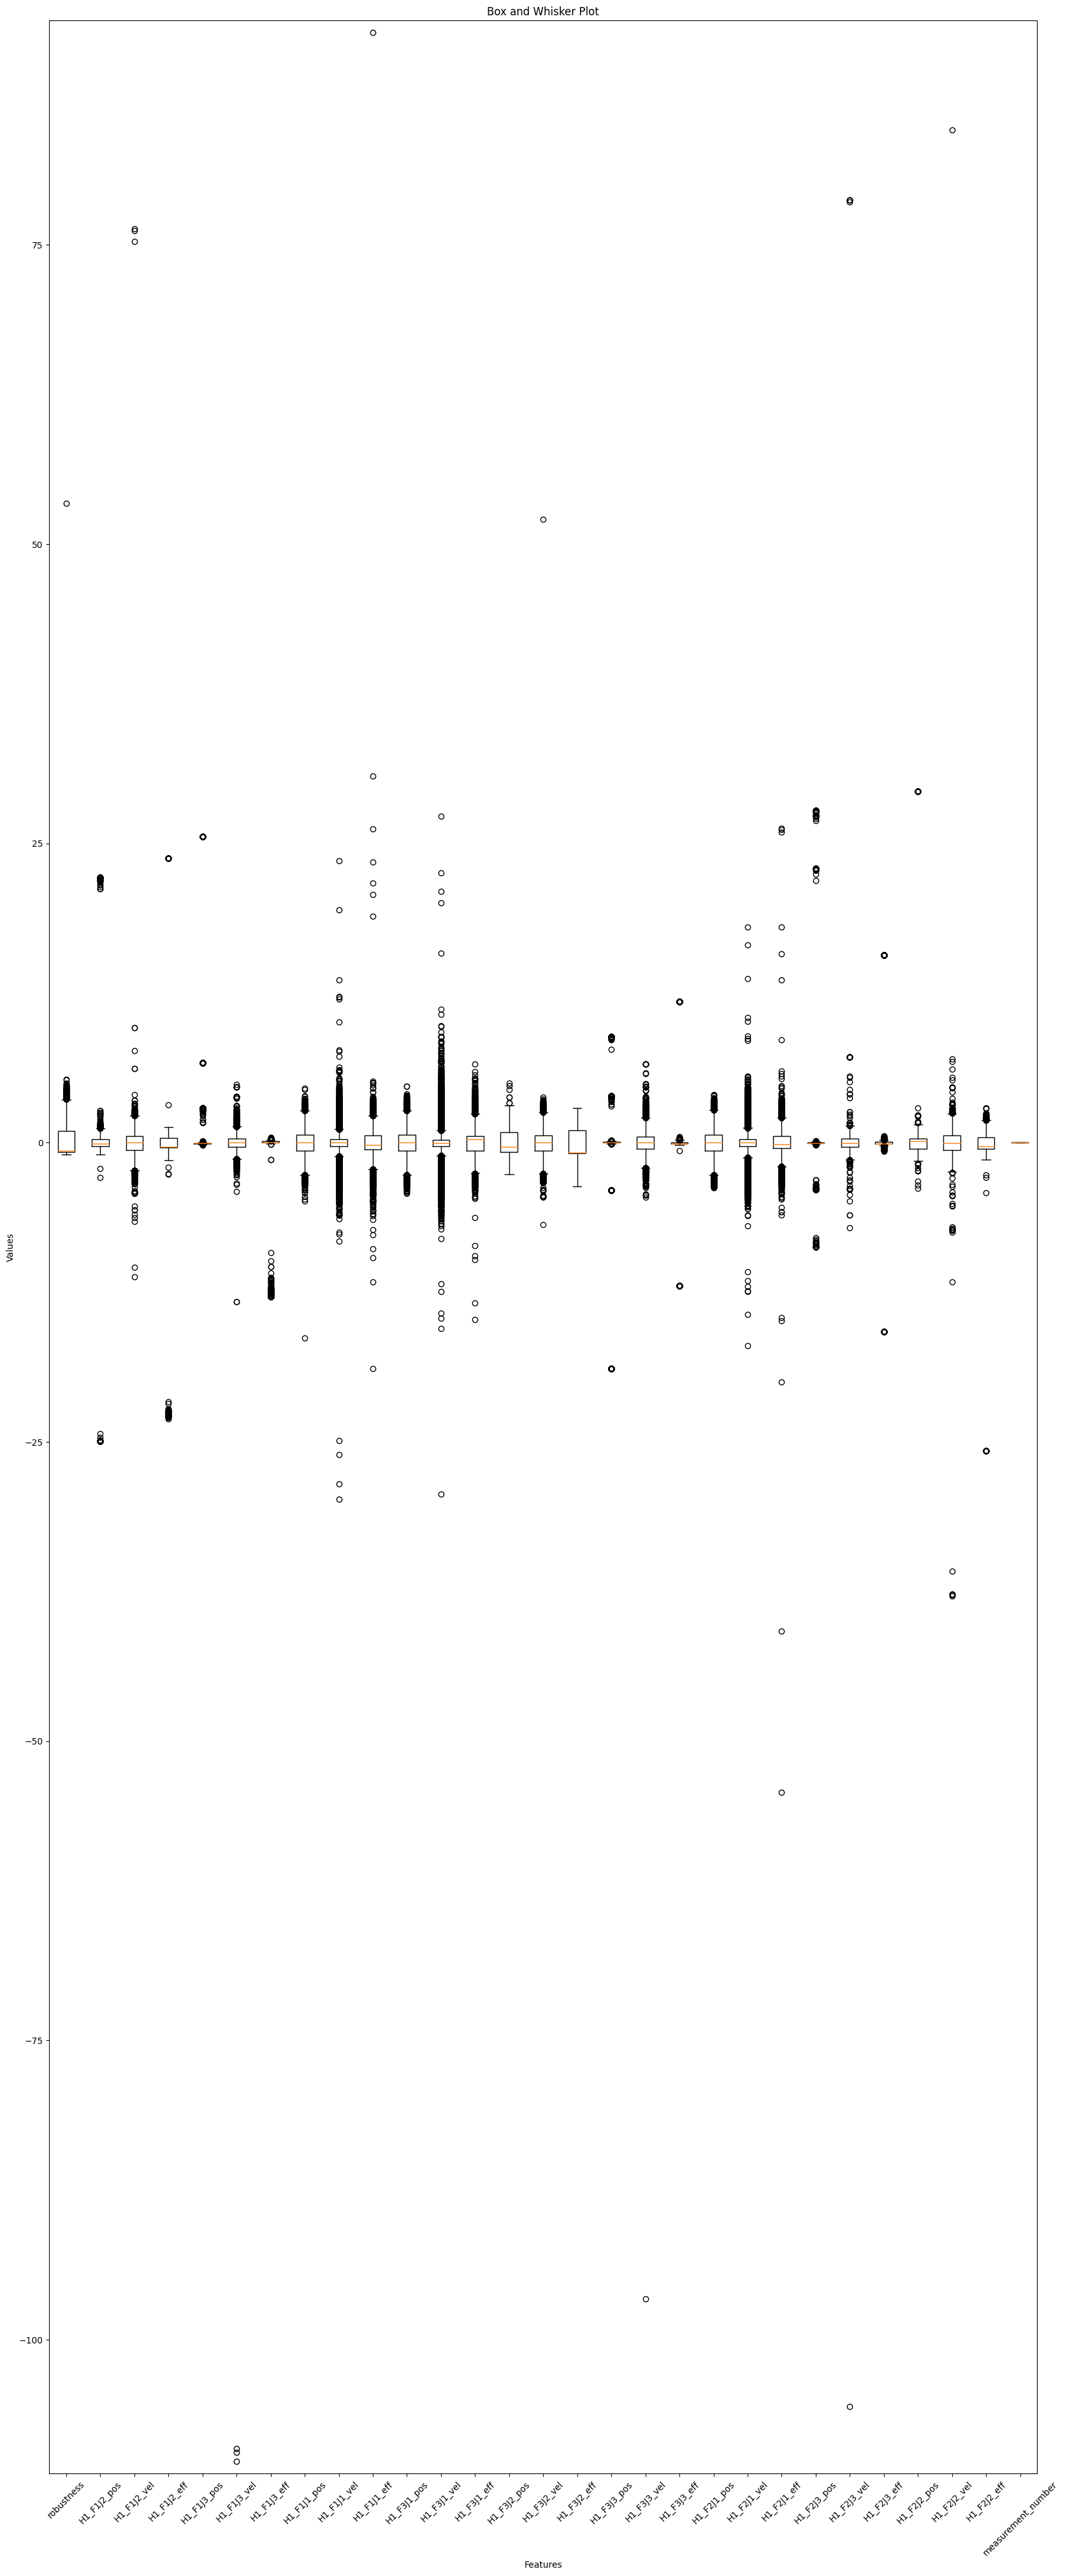

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


feature_names = df_scaled.columns.tolist()

plt.figure(figsize=(20, 50))

plt.boxplot(df_scaled)


plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box and Whisker Plot')


plt.xlim(0.5, len(feature_names) + 0.5)
plt.ylim(min(df_scaled.min()) - 1, max(df_scaled.max()) + 1)


plt.xticks(range(1, len(feature_names) + 1), feature_names, rotation=45)

plt.show()


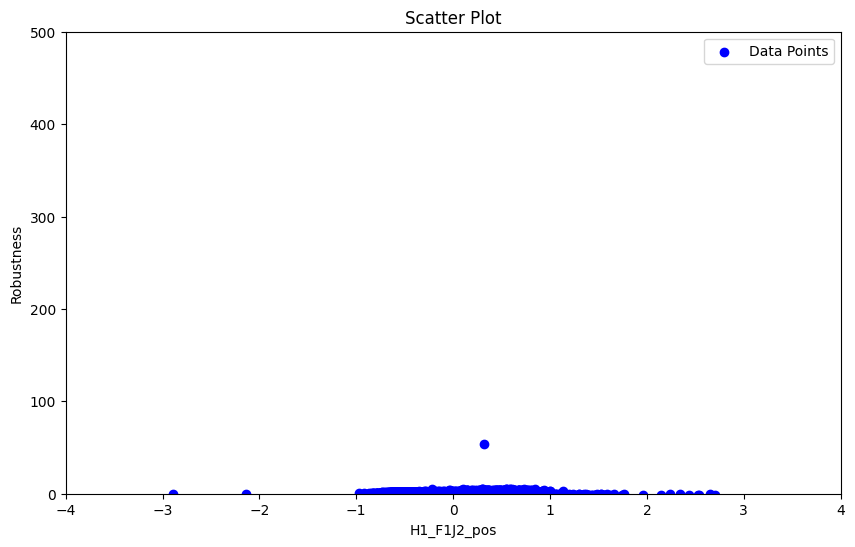

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['H1_F1J2_pos'], df_scaled['robustness'], label='Data Points', color='b', marker='o')

plt.xlabel('H1_F1J2_pos')
plt.ylabel('Robustness')
plt.title('Scatter Plot')


plt.xlim(-4, 4)
plt.ylim(0, 500)

plt.legend()
plt.show()


In [ ]:
#sns.pairplot(df_scaled, diag_kind='kde')
#plt.show()

# Linear Regression

In [ ]:
X = df_scaled.iloc[:, 1:]
Y = (df_scaled['robustness'] > 1).astype(int)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
threshold = 0.5
Y_pred_binary = (y_pred > threshold).astype(int)


NameError: ignored

In [ ]:

accuracy = accuracy_score(Y_test, Y_pred_binary)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 77.79%


In [ ]:
good_grasps = X_test[Y_test == 1]
unstable_grasps = X_test[Y_test == 0]


In [ ]:
predictions_good_grasp = model.predict(good_grasps)
predictions_unstable_grasp = model.predict(unstable_grasps)

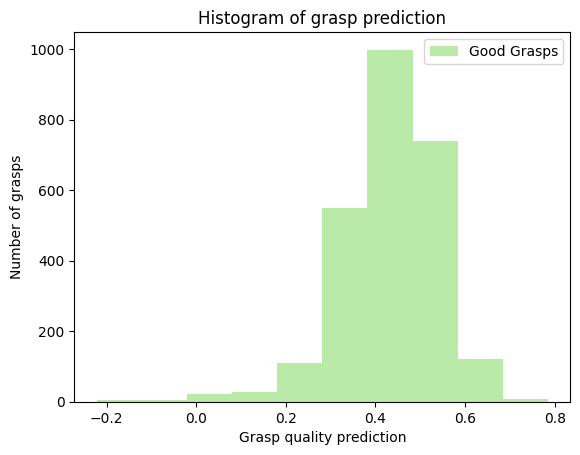

In [ ]:
plt.hist(predictions_good_grasp, color='#77D651', alpha=0.5, label='Good Grasps')
plt.title('Histogram of grasp prediction')
plt.ylabel('Number of grasps')
plt.xlabel('Grasp quality prediction')
plt.legend(loc='upper right')
plt.show()

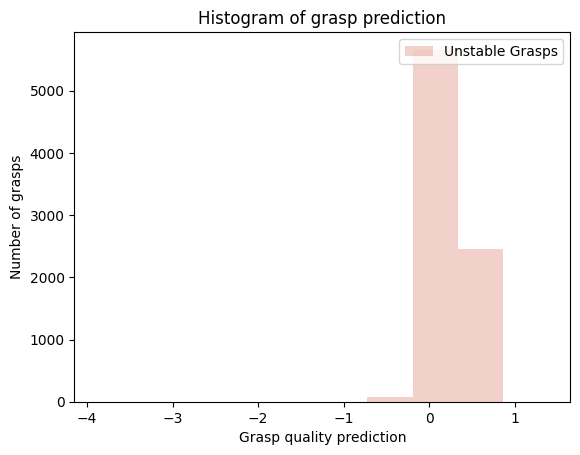

In [ ]:

plt.hist(predictions_unstable_grasp, color='#D66751', alpha=0.3, label='Unstable Grasps')
plt.title('Histogram of grasp prediction')
plt.ylabel('Number of grasps')
plt.xlabel('Grasp quality prediction')
plt.legend(loc='upper right')
plt.show()

In [ ]:
X = df_scaled.drop(['robustness'], axis=1)
y = df_scaled['robustness']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train, y_train)

sklearn_predictions = sklearn_lr.predict(X_test)
sklearn_mse = mean_squared_error(y_test, sklearn_predictions)
sklearn_r2 = r2_score(y_test, sklearn_predictions)
print("Sklearn Model - MSE: {:.2f}, R2 Score: {:.2f}".format(sklearn_mse, sklearn_r2))

Sklearn Model - MSE: 0.56, R2 Score: 0.41
